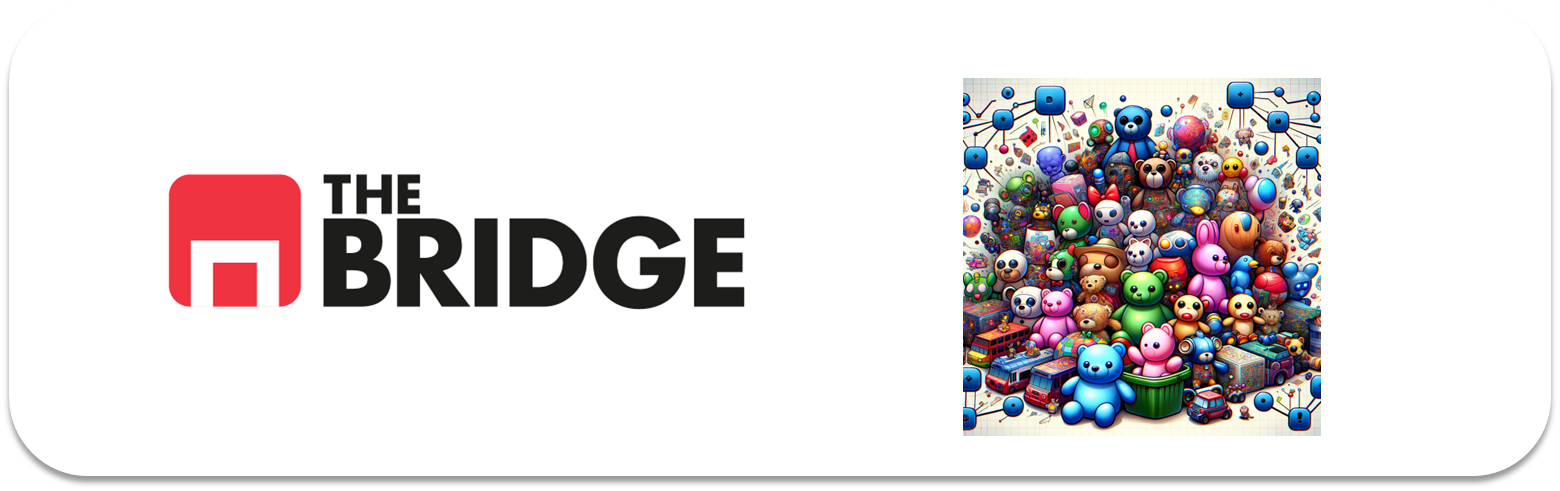

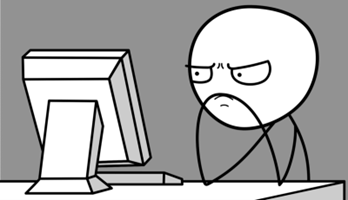

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Muestra el target. Luego cárgalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

*Aquí lo importante es ver que el dataset de entrada está ordenado según el target, de ahí que se pida que se reordene aleatoriamente*

In [5]:
olivetti.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [6]:
df_olivetti = pd.DataFrame(olivetti.data, columns = [f"pixel_{i}" for i in range(4096) ])

In [7]:
df_olivetti

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [8]:
df_olivetti.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4086,pixel_4087,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


In [9]:
df_olivetti["cara"] = olivetti.target

In [10]:
df_olivetti.cara

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: cara, Length: 400, dtype: int32

*Como era de esperar el target sigue ordenado :-)*

In [11]:
df_olivetti = df_olivetti.sample(len(df_olivetti))

In [12]:
df_olivetti.cara

25      2
283    28
148    14
160    16
157    15
       ..
398    39
46      4
210    21
396    39
232    23
Name: cara, Length: 400, dtype: int32

*Y ahora ya no*

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (280 regristros-80 registros-40 registros). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 360-40 (resto-test) en registros y luego otro split sobre los 360 en 280-80. (train-validation)

In [13]:
df_olivetti.cara.value_counts(True)

cara
2     0.025
28    0.025
23    0.025
1     0.025
11    0.025
30    0.025
0     0.025
34    0.025
12    0.025
6     0.025
35    0.025
20    0.025
39    0.025
27    0.025
4     0.025
18    0.025
7     0.025
19    0.025
5     0.025
25    0.025
22    0.025
13    0.025
38    0.025
14    0.025
16    0.025
15    0.025
21    0.025
3     0.025
24    0.025
17    0.025
31    0.025
9     0.025
32    0.025
37    0.025
36    0.025
29    0.025
8     0.025
26    0.025
10    0.025
33    0.025
Name: proportion, dtype: float64

In [14]:
# Metodo 1, Split en test sucesivos

train_val, test_set = train_test_split(df_olivetti, test_size = 40, stratify= df_olivetti["cara"], random_state= 42) # train_size
train_set, validation_set = train_test_split(train_val, test_size = 80, stratify= train_val["cara"], random_state= 43)

In [32]:
400 - 40 - 80
# 280 puntos en train (fotos) 4096 columnas
# 80 puntis en validacion (fotos) 4096 features
# 40 puntos en test (fotos) 4096 features

280

### #1.4

Crea los pares X,y para train, validation y test.

In [15]:
X_train = train_set.drop("cara", axis = 1)
X_valid = validation_set.drop("cara", axis = 1)
X_test = test_set.drop("cara", axis = 1)

y_train = train_set["cara"]
y_valid = validation_set["cara"]
y_test = test_set["cara"]

Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [16]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

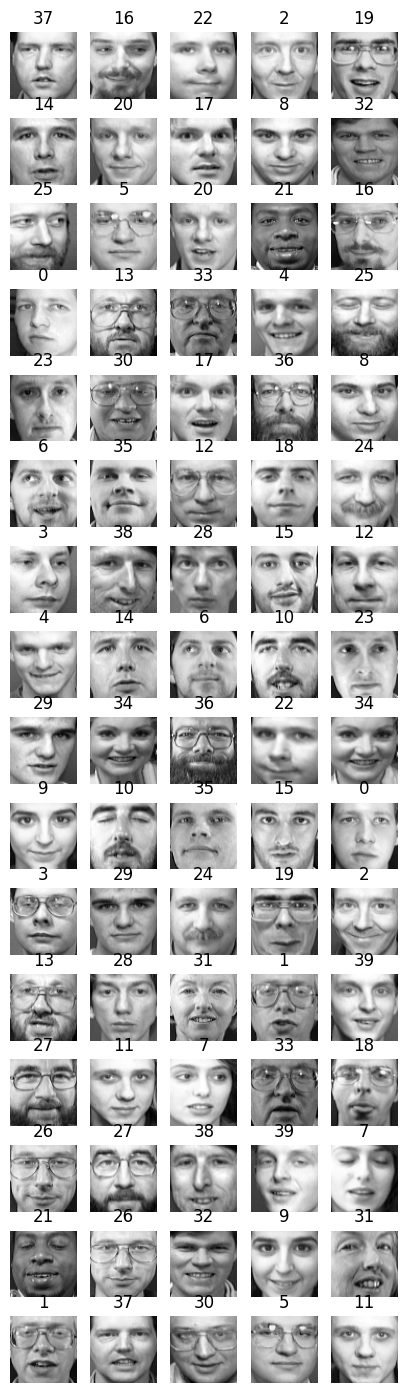

In [17]:
plot_faces(X_valid.values, y_valid)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(0.99) # varianza explicada
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_ # 200 componentes (dimensiones transformadas)

199

In [19]:
pd.DataFrame(X_test_pca, columns= [f"feat_new_{i}" for i in range(1,pca.n_components_+1)])

,feat_new_1,feat_new_2,feat_new_3,feat_new_4,feat_new_5,feat_new_6,feat_new_7,feat_new_8,feat_new_9,feat_new_10,...,feat_new_190,feat_new_191,feat_new_192,feat_new_193,feat_new_194,feat_new_195,feat_new_196,feat_new_197,feat_new_198,feat_new_199
0,1.089219,1.671745,-2.377638,0.016208,1.196608,0.429582,-1.685314,0.437800,-0.869067,-0.466588,...,-0.391553,-0.181565,0.015090,0.157153,0.159353,0.239609,-0.125888,0.237894,-0.250617,-0.021802
1,-5.948128,4.901214,0.849208,1.427245,1.888696,-3.194651,2.960631,-0.015973,0.605713,-0.237773,...,-0.238233,-0.213183,-0.116272,-0.185640,-0.208827,-0.038020,-0.030135,-0.158161,0.170286,0.168065
2,4.535792,3.492307,3.729793,-2.156789,-1.396437,-0.716812,-0.168368,0.273896,0.744716,0.859183,...,0.255120,0.105606,0.067364,0.105458,0.124042,-0.182511,-0.013060,0.136880,0.163628,0.017950
3,-4.549634,-0.219333,-2.808263,1.189194,1.271661,0.367009,0.799085,0.100118,-1.441632,-0.228297,...,-0.122505,-0.055003,-0.064558,-0.088897,-0.067196,-0.126468,0.113808,0.005331,0.050599,-0.051768
4,-5.750780,-1.699025,-1.820570,-3.035996,-0.966309,-1.333585,2.200670,1.293324,-0.941240,-2.097354,...,-0.030284,-0.033099,0.142415,0.136611,-0.056065,-0.083513,0.073973,0.145124,0.271763,-0.049042
5,2.423765,3.077984,1.115402,0.035787,-0.059198,-0.725198,-0.776376,2.425981,0.923255,2.037915,...,0.105722,0.024620,0.015313,-0.005059,-0.067087,-0.280122,-0.187437,-0.084998,-0.014977,0.074658
6,-0.543448,0.924341,1.889931,-2.817759,1.100099,1.725001,-1.610270,-2.806451,0.313847,0.378450,...,0.217356,-0.152689,-0.061126,0.113270,0.083747,-0.003701,0.111452,-0.053146,0.119991,0.005461
7,-1.754528,-1.747164,3.562859,0.773280,0.077440,-3.513424,0.560116,-1.529709,1.455775,-0.138617,...,0.169628,-0.077266,-0.161149,-0.115864,-0.076973,-0.069574,0.261333,-0.075128,0.038510,-0.093865
8,-3.078303,4.406728,-2.753070,-2.551555,0.541196,-0.471721,0.483335,-1.481331,-0.079604,1.047834,...,0.182383,0.085559,-0.297978,0.042934,-0.080486,-0.094048,0.019170,-0.015976,-0.349743,0.171841
9,2.185327,-0.795694,-0.132699,1.391167,1.016626,0.015309,-1.234811,0.642364,-0.222860,0.846123,...,0.052968,-0.006171,0.042194,0.087559,-0.037092,-0.016774,0.018293,-0.220299,-0.317249,0.038612


*Hemos reducido nuestro dataset a 200 features, ojo si intentas pintarlos con plt.imshow verás que no se ve nada...*

### 1.6

Aquí viene lo interesante. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [20]:
from sklearn.cluster import KMeans

k_range = range(5, 151, 5)
kmeans_per_k = []
for k in k_range:
    print(f"k={k}")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145
k=150


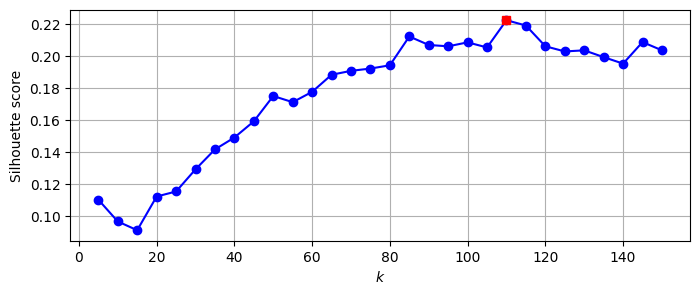

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index] # Esto para pintarlo 
best_score = silhouette_scores[best_index] # equivalente a max(silhouette_scores)

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

In [22]:
best_k

110

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

*Parece que la mejor cantidad de grupos es bastante alta, en 120. Podrías haber esperado que fueran 40, ya que hay 40 personas diferentes en las imágenes. Sin embargo, la misma persona puede lucir bastante diferente en diferentes imágenes (por ejemplo, con o sin gafas, o simplemente desplazada a la izquierda o a la derecha).*

*Por eso probamos el método del codo de inercia*

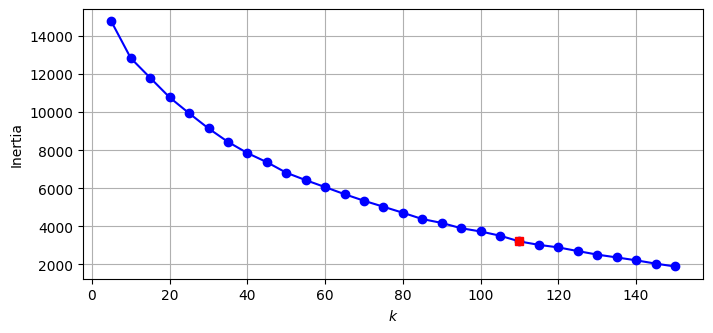

In [23]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

*El número óptimo de clústeres no está claro en este diagrama de inercia, ya que no hay un codo obvio, así que vamos a quedarnos con k=120.*

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [24]:
best_model = kmeans_per_k[best_index]

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo, tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

Cluster 0


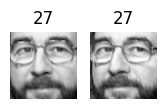

Cluster 1


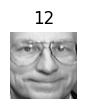

Cluster 2


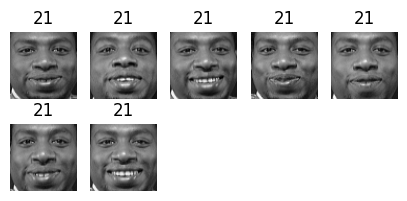

Cluster 3


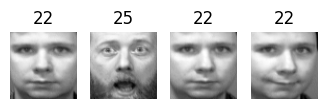

Cluster 4


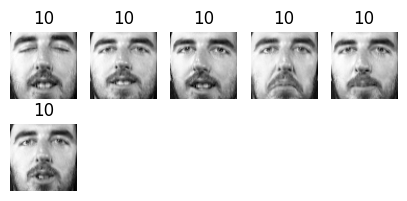

Cluster 5


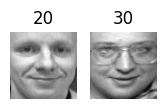

Cluster 6


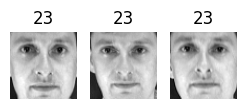

Cluster 7


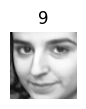

Cluster 8


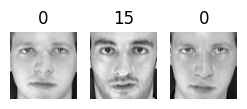

Cluster 9


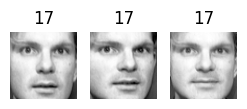

Cluster 10


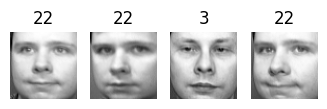

Cluster 11


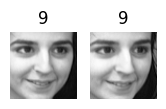

Cluster 12


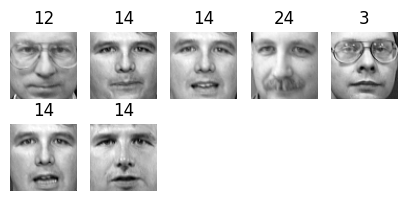

Cluster 13


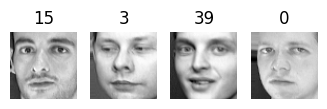

Cluster 14


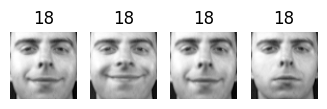

Cluster 15


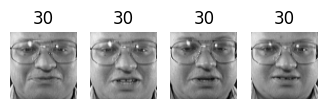

Cluster 16


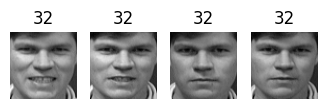

Cluster 17


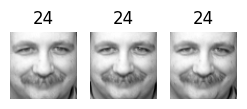

Cluster 18


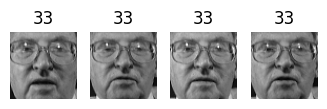

Cluster 19


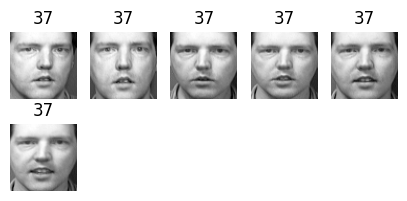

Cluster 20


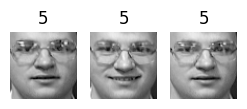

Cluster 21


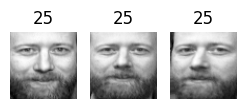

Cluster 22


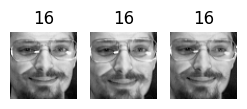

Cluster 23


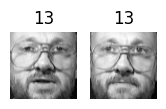

Cluster 24


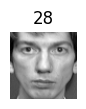

Cluster 25


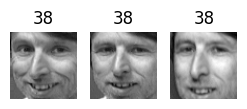

Cluster 26


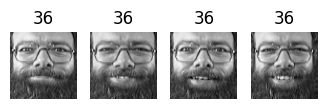

Cluster 27


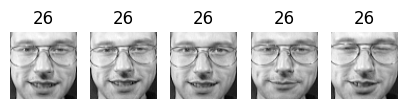

Cluster 28


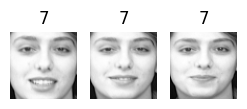

Cluster 29


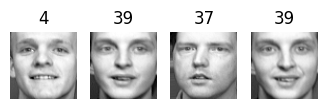

In [25]:


for cluster_id in np.unique(best_model.labels_)[0:30]:
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].values # con X_train, NO X_train_pca porque cada fila es la misma foto, pero no se vería
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

*Cerca de 2 de cada 3 clusters son útiles: es decir, contienen al menos 2 imágenes, todas de la misma persona. Sin embargo, el resto de los clusters tienen uno o más intrusos, o tienen solo una imagen.*

*Agrupar imágenes de esta manera puede ser demasiado impreciso para ser directamente útil al entrenar un modelo (como veremos más abajo), pero puede ser tremendamente útil al etiquetar imágenes en un nuevo conjunto de datos: usualmente hará que el etiquetado sea mucho más rápido.*

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.95

In [27]:

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_valid, y_valid) # sin PCA

0.925

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad (centroides) y entrena un clasificador en el conjunto reducido (con PCA). Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalúalo contra el dataset de validacion.

In [28]:
X_train_reduced = best_model.transform(X_train_pca)  # best_model es un KMeans con k = 120 ; X_train_pca son 280 filas, 200 features PCA; 280 filas y 120 columnas
X_valid_reduced = best_model.transform(X_valid_pca) # transform devuelve las distancias a cada centroide; 80 filas, 120 columnas
X_test_reduced = best_model.transform(X_test_pca) # 40 filas, 120 columnas

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train) # dadas 120 columnas, predice la cara
    
clf.score(X_valid_reduced, y_valid) # accuracy medio

0.7875

*No siempre ayuda una reducción de dimensionalidad, y en algunos casos puede que tampoco sea muy apropiada*

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

Podríamos usar un `GridSearchCV` cambiando el dataset de features pero para ello necesitamos un poco más de conocimiento de las tripas de sklearn. Como ya tenemos un conjunto de validación, no necesitamos validación cruzada K-fold, y solo estamos explorando un hiperparámetro, por lo que es más sencillo ejecutar un bucle manualmente:

In [29]:
for n_clusters in k_range:
    model = KMeans(n_clusters, n_init = 10, random_state = 42)
    model.fit(X_train_pca, y_train)
    X_temp = model.transform(X_train_pca)
    X_valid_temp = model.transform(X_valid_pca)
    rf_clf = RandomForestClassifier(n_estimators = 150, random_state = 42)
    rf_clf.fit(X_temp, y_train)
    print(n_clusters, rf_clf.score(X_valid_temp, y_valid))

5 0.5
10 0.525
15 0.6375
20 0.6375
25 0.7
30 0.7
35 0.75
40 0.7375
45 0.75
50 0.7875
55 0.7125
60 0.8
65 0.7625
70 0.775
75 0.8
80 0.75
85 0.775
90 0.8
95 0.7375
100 0.8
105 0.8375
110 0.7875
115 0.7625
120 0.7625
125 0.7875
130 0.8
135 0.7875
140 0.8375
145 0.8125
150 0.7625


In [30]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
    pipeline = make_pipeline(
        KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
        RandomForestClassifier(n_estimators=150, random_state=42)
    )
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.5
10 0.525
15 0.6375
20 0.6375
25 0.7
30 0.7
35 0.75
40 0.7375
45 0.75
50 0.7875
55 0.7125
60 0.8
65 0.7625
70 0.775
75 0.8
80 0.75
85 0.775
90 0.8
95 0.7375
100 0.8
105 0.8375
110 0.7875
115 0.7625
120 0.7625
125 0.7875
130 0.8
135 0.7875
140 0.8375
145 0.8125
150 0.7625


*No hemos obtenido una mejora, no pasamos del 0.77, pero nos ha servido para practicar no sólo clustering de por sí, sino también nos ha permitido jugar con este como método (Aquí poco exitoso) para reducir features y dimensionalidad*

In [31]:
# 0.77 puede variar por semillas no fijadas